In [1]:
import pandas, numpy

# Initializes data
data = pandas.read_csv('nalcs.csv').drop('Unnamed: 0', 1)
stop = open("stop-word-list.txt").read().splitlines()
data = data[data.message.notnull()]

In [2]:
# Cleans message data into a bag of words
messages = data.message.str.lower()
for p in ".,!?:;\"'-~|[]()/\\\n":
    messages = messages.str.replace(p,' ')
messages = messages.str.split()
data['words'] = messages.apply(lambda x: [w for w in x if w.isalpha() and w not in stop])
data['len'] = data.words.apply(len)
print('Number of messages: ' + str(len(data)))
print('Maximum number of words: ' + str(data.len.max()))
print('Minimum number of words: ' + str(data.len.min()))
print('Average number of words: ' + str(data.len.mean()))
print('Fewest words message: ' + data.message.loc[data.len.argmin()])
print('Most words message: ' + data.message.loc[data.len.argmax()])

Number of messages: 177336
Maximum number of words: 24
Minimum number of words: 0
Average number of words: 2.0424335724274822
Fewest words message: :.
Most words message: NA sucks NA sucks NA sucks NA sucks NA sucks NA sucks NA sucks NA sucks NA sucks NA sucks NA sucks NA sucks


In [3]:
# Sentiment Analysis
pos = open('positive.txt').read().splitlines()
neg = open('negative.txt').read().splitlines()

data['pos'] = [len([w for w in t if w in pos]) for t in data.words]
data['neg'] = [len([w for w in t if w in neg]) for t in data.words]
data['comb'] = data.pos - data.neg

In [4]:
import datetime
data['minute'] = [datetime.datetime.fromtimestamp(x/1000.).strftime('%m/%d %H:%M') for x in data.timestamp]

04/23 14:34
pos     0.291667
neg     0.000000
comb    0.291667
Name: 04/23 14:34, dtype: float64
04/23 17:53
pos     0.024922
neg     0.327103
comb   -0.302181
Name: 04/23 17:53, dtype: float64


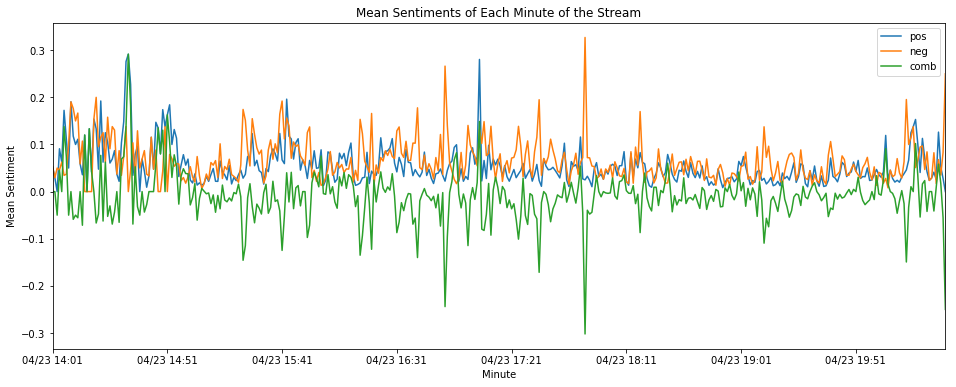

In [5]:
# Time series visualization of sentiment analysis
g = data.groupby('minute')
gt = g.mean().loc[:,['pos','neg','comb']]

print(gt.comb.argmax())
print(gt.loc[gt.comb.argmax()])

print(gt.comb.argmin())
print(gt.loc[gt.comb.argmin()])

%matplotlib inline
ax = gt.plot()
ax.set_title('Mean Sentiments of Each Minute of the Stream')
ax.set_xlabel('Minute')
ax.set_ylabel('Mean Sentiment')
ax.figure.set_size_inches(16, 6, forward=True)

In [6]:
# The most positive minutes
gt[gt.comb > 0.3]

,pos,neg,comb
minute,,,


In [7]:
# The most negative minutes
gt[gt.comb < -0.3]

,pos,neg,comb
minute,,,
04/23 17:53,0.024922,0.327103,-0.302181


In [8]:
# Sentiment Analysis on emotes
posemotes = open('positiveemotes.txt').read().splitlines()
negemotes = open('negativeemotes.txt').read().splitlines()

data['posemotes'] = [len([w for w in t if w in posemotes]) for t in data.words]
data['negemotes'] = [len([w for w in t if w in negemotes]) for t in data.words]
data['combemotes'] = data.posemotes - data.negemotes

04/23 15:58
posemotes     1.094340
negemotes     0.069811
combemotes    1.024528
Name: 04/23 15:58, dtype: float64
04/23 20:23
posemotes     0.084211
negemotes     0.555263
combemotes   -0.471053
Name: 04/23 20:23, dtype: float64


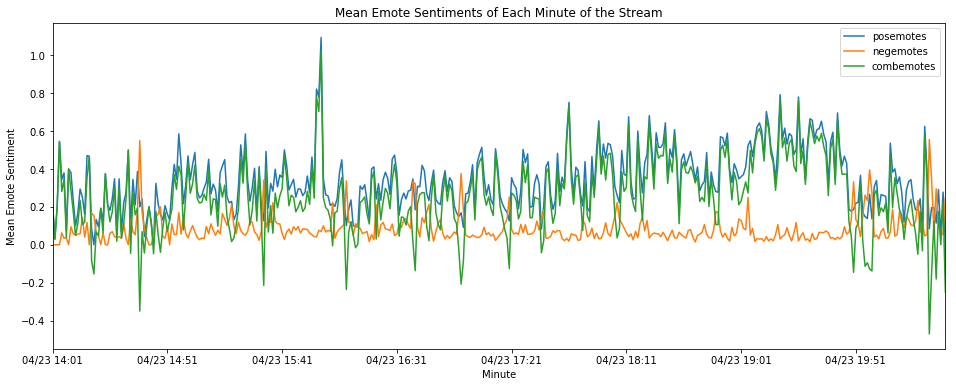

In [9]:
# Time series visualization of emote sentiment analysis
g = data.groupby('minute')
gtemotes = g.mean().loc[:,['posemotes','negemotes','combemotes']]

print(gtemotes.combemotes.argmax())
print(gtemotes.loc[gtemotes.combemotes.argmax()])

print(gtemotes.combemotes.argmin())
print(gtemotes.loc[gtemotes.combemotes.argmin()])

ax = gtemotes.plot()
ax.set_title('Mean Emote Sentiments of Each Minute of the Stream')
ax.set_xlabel('Minute')
ax.set_ylabel('Mean Emote Sentiment')
ax.figure.set_size_inches(16, 6, forward=True)

In [10]:
# The most positive minutes
gtemotes[gtemotes.combemotes > 0.3]

,posemotes,negemotes,combemotes
minute,,,
04/23 14:04,0.545455,0.000000,0.545455
04/23 14:06,0.379310,0.034483,0.344828
04/23 14:08,0.400000,0.000000,0.400000
04/23 14:16,0.470588,0.117647,0.352941
04/23 14:17,0.466667,0.000000,0.466667
04/23 14:24,0.375000,0.000000,0.375000
04/23 14:28,0.347826,0.043478,0.304348
04/23 14:30,0.347826,0.043478,0.304348
04/23 14:34,0.500000,0.000000,0.500000


In [11]:
# The most negative minutes
gtemotes[gtemotes.combemotes < -0.3]

,posemotes,negemotes,combemotes
minute,,,
04/23 14:39,0.200000,0.550000,-0.350000
04/23 20:23,0.084211,0.555263,-0.471053


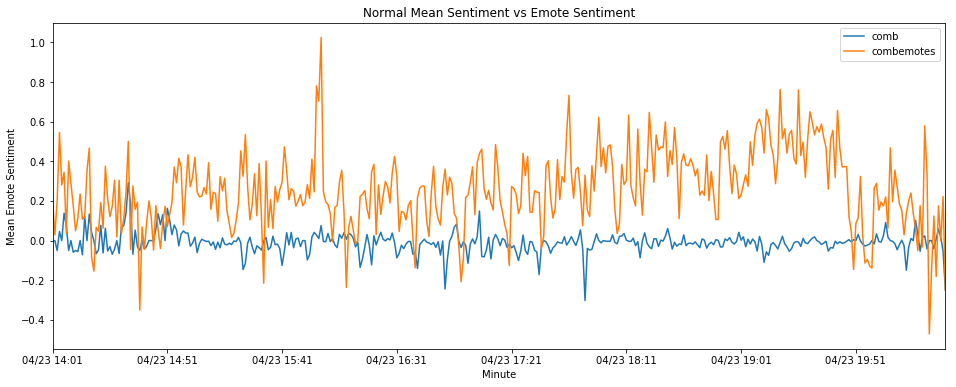

In [12]:
# Plot of normal lexicon sentiment analysis and emote analysis
gtt = pandas.concat([gt.loc[:,['comb']], gtemotes.loc[:,['combemotes']]], axis=1)
ax = gtt.plot()

ax.set_title('Normal Mean Sentiment vs Emote Sentiment')
ax.set_xlabel('Minute')
ax.set_ylabel('Mean Emote Sentiment')
ax.figure.set_size_inches(16, 6, forward=True)

In [13]:
# Computes Pearson correlation between sentiment analysis and emote analysis
combmean = gtt.comb.mean()
combemotesmean = gtt.combemotes.mean()
r = sum((gtt.comb - combmean) * (gtt.combemotes - combemotesmean))/(numpy.sqrt(sum((gtt.comb - combmean)**2)) * numpy.sqrt(sum((gtt.combemotes - combemotesmean)**2)))
r

0.014037068941554232

In [19]:
data.loc[data.minute == '04/23 14:34'].message

901            5k people in the chat and not a single xD
902                                              hi guys
903                                                  bo1
904                                     FRESM VS CLWON 9
905                                                   Dx
906                                                   zD
907             Pretty sure TSM'S midlane is better tbh.
908                                                   xd
909                                     @Tsukuyomi27, xD
910                                             PogChamp
911                                                   cx
912    THE only reason why i support tsm is cause of ...
913                                                   XD
914                                                   xD
915       @brazzersnetworksd gimme free account Kreygasm
916                              SourPls SourPls SourPls
917                                Bjergsen is funny imo
918                            